# Visualizations<br>
Us humans can't understand numbers as well as computers. We are mostly visual learners.That is why visualizations help us immensely in understanding data. This skill is used in every part of Machine Learning pipeline - from loading data, to presenting the results.<br><br>
After loading data, next logical step would be (visual) exploration of the data at hand. The process of (mostly) visual anlaysis of data is called <b>Exploratory Data Analysis</b> (EDA) in the machine learning community. This is both a simple and fast way of getting insights about our data. Not only that, at the end of Machine Learning Pipeline, we need to present our findings to the <i>non-technical</i> people that are actually making decisions based on our analysis. They need to understand everything you've done as clearly as possible.<br><br>
Libraries we'll be using in this part are: `matplotlib` and `seaborn`. The dataset we'll be using is the same as before and can be found on <a href='https://www.kaggle.com/becksddf/churn-in-telecoms-dataset'>this link</a>.<br><br>
Since data can be numerical and categorical in nature, there are mutiple ways to chart (we say plot) them. This can be done in several categories:<br>
<ul><li>Univariate Plots</li>
    <ul><li>Quantitative Features</li>
        <li>Categorical/Binary Features</li></ul>
    <li>Multivariate Plots</li>
    <ul><li>Quantitative vs. Quantitative</li>
        <li>Quantitative vs. Categorical</li>
        <li>Categorical vs. Categorical</li></ul></ul><br>
As always, we'll start by importing the important libraries.

In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max.columns', 25)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

Since we are using the same dataset as before, we can just load it in the pandas `DataFrame`.

In [4]:
df = pd.read_csv('data/churn.csv')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Univariate Plots<br>
As the name suggests, <i>univariate</i> plotting uses only one feature. We plot one feature independently of other ones, because we are interested about the distribution of that feature and not the relationship it has with others.

### Quantitative Features<br>
Quantitative features have numerical and ordered values. They are devided into <i>descrete</i> and <i>continous</i> variables. Example of descrete variables are integers and for continous one's are real numbers.<br><br>
<b>Histograms</b><br><br>
Pandas library has a built-in function for plotting histograms called `hist()`. If you don't know what exactly histograms are, we'll explain it in a second.

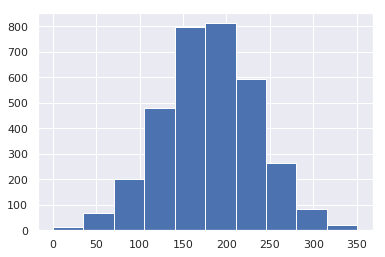

In [6]:
df['Day Mins'].hist()

As can be seen from the above, we have 10 bins. A histogram creates a plot where each bin covers an equal range of values. Here, each bin has range length of ~ 35. Using this plot, we can find about the distribution of that feature. Is it Gaussian? Is it skewed? This is important because some machine learning algorithms accept only features of certain distribution (most frequently Gaussian), which is why we need to find the current distribution and edit it so it can become useful for further work.<br>
We can manipulate how many bins we want with the `bins` parameter.

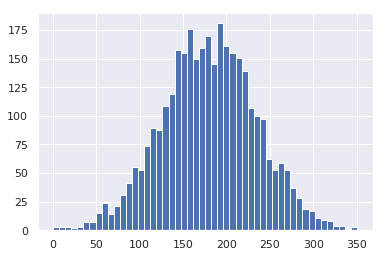

In [10]:
df['Day Mins'].hist(bins=50)

But sometimes it's easier to get to a conclusion about the distribution when we look a the smooth line representing <b>density plots</b>. This function is also built-in into pandas library, and can be used with `plot()` function and `kind` parameter set to density.

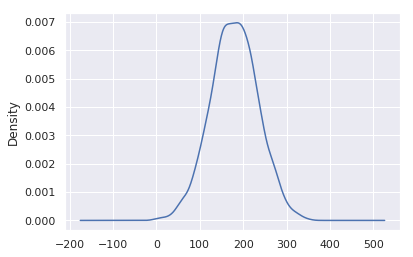

In [11]:
df['Day Mins'].plot(kind='density')

We can combine these two plots into one, by using `seaborn`'s function `distplot()`. Unlike histograms which show how many observations are in each bin, in density plots, we show density of the feature. This is the reason why height of histogram bars sometimes surpass the density plot's line.

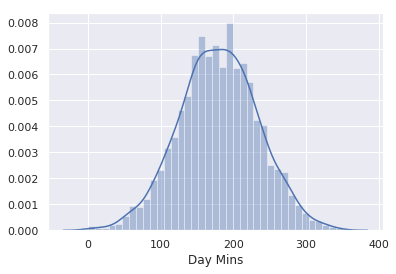

In [13]:
sns.distplot(df['Day Mins'])

<b>Box plot</b><br><br>
This type of plot is heavy on statistics. Sometimes that's exactly what we need.

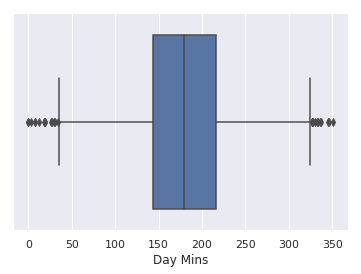

In [14]:
sns.boxplot(df['Day Mins'])

A box plot has 3 main parts:<br>
<ol><li>Box (duh!) - consists of median value (line in the middle of the box), aswell as 25th and 75th percentile which are also called Q1 and Q3. Length of the box represents the IQR (inter quartile range) which is Q3-Q1.</li>
    <li>Whiskers - lines extending out of the box, which hold all of data that fall within a statistically meaningful interval (Q1 - 1.5 IQR; Q3 + 1.5 IQR)</li>
    <li>Outiers - all those tiny dots that are on the left of the left, and on the right of the right whisker which aren't statistically meaningful.</li></ol>

### Categorical Features<br>
Categorical features have values which place an observation in some group called category. When the number of categories is 2, this type of features is called binary. If there's order between the values in a category, we call it ordinal.<br>
Some examples are:
<ul><li>Binary: yes-no, male-female(?), true-false...</li>
    <li>Ordinal: level of education, economic status...</li></ul><br>
<b>Bar plots</b><br><br>
Even though they are similar to histograms, they are not the same. Bar plots are used in visualizing categorical features. That's why the width of the bars don't matter here. Only important values to look for are on the y-axis.

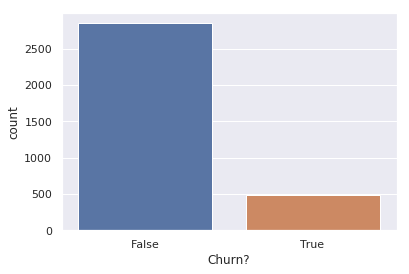

In [16]:
sns.countplot(df['Churn?'])

From the above example, we can see that our target feature is highly inbalanced - there are a lot more False values than True ones. That's something useful to know when we come to the part where we use machine learning algorithms.

## Multivariate Plots<br>
The power of multivariate plots is in that they give us the information about the relationship between two features. That information can be further used to change our approach of data analysis.<br>
As we've seen before, there are 3 combinations of multivariate plots, so let's start with the first!<br><br>
### Quantitative vs. Quantitative<br>
<b>Scatter plots</b><br><br>
Scatter plots are used to show the values of two features, usually in 2D space.

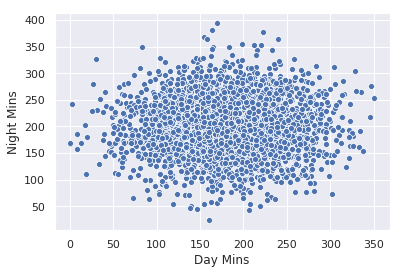

In [19]:
sns.scatterplot(df['Day Mins'], df['Night Mins'])

Our only conclusion from this plot is that the two features used aren't correlated - they don't affect each other in any way. Since the figure on the plot is ellipse-like, that means the two features have normal-like distributions.<br>
We can check that with `jointplot()` from the `seabon` library.

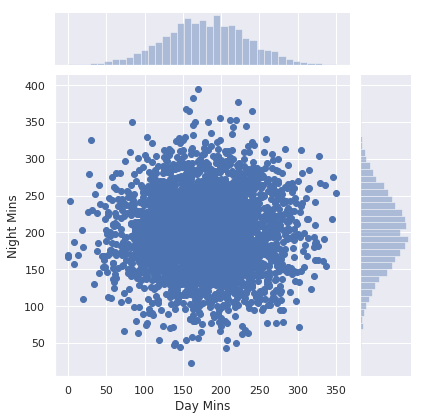

In [20]:
sns.jointplot(df['Day Mins'], df['Night Mins'])

We can only see that there <i>are</i> blue dots all around, but we can't see the density of those blue dots. We could do that and with the same plot as before!

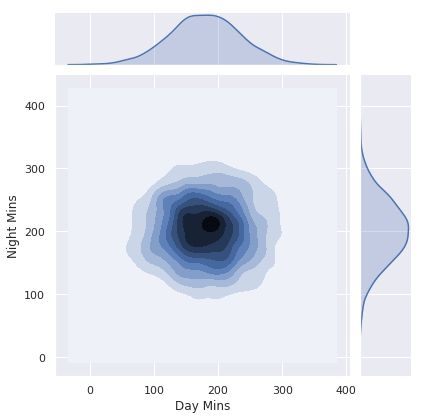

In [21]:
sns.jointplot(df['Day Mins'], df['Night Mins'], kind='kde')

Another useful way of visually analyzing our data is by using `pairplot()`. This function produces NxN matrix of plots where N is the number of features provided. The main diagonal is regular distributions of the features.

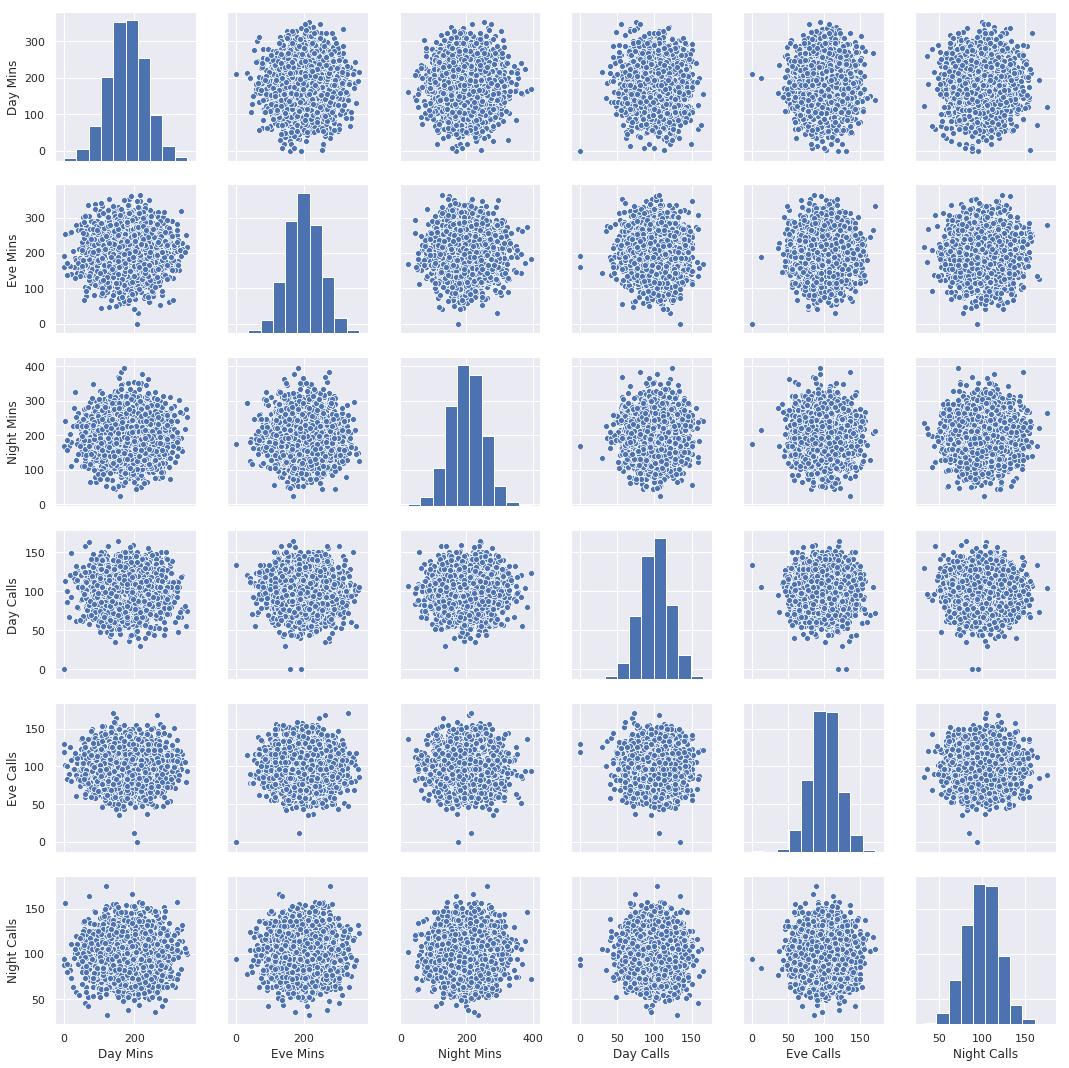

In [22]:
columns_to_show = ['Day Mins', 'Eve Mins', 'Night Mins', 'Day Calls', 'Eve Calls', 'Night Calls']
sns.pairplot(df[columns_to_show])

<b>Heatmap plots</b><br><br>
Heatmap plots are used when we want to find the correlation between all features - if one affects the other. That is important because some machine learning algorithms work much better when we drop the correlated features.

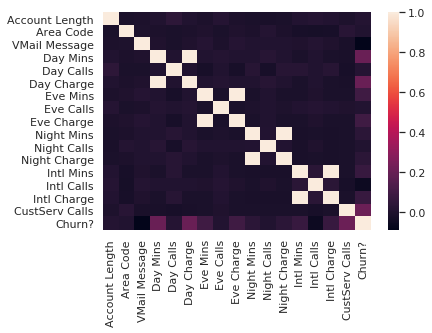

In [23]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

From the above plot, we can see that `Day Mins` and `Day Charge` are highly correlated which is logical. The more minutes we spend talking, the bigger the charge is. Now we know which features are non-important and can be deleted: `Day Mins`, `Eve Mins`, `Night Mins` and `Int'l Mins`.<br><br>
### Quantitative vs. Categorical<br>
This type of plots is highly beneficial when our task is classification. We can have a look how our input features (quantitative) interract with our target feature (categorical).<br><br>
Similar to the `scatterplot()` we used earlier, we can use the same plot but with the difference in the name.

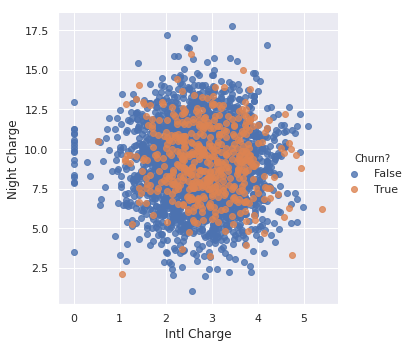

In [30]:
sns.lmplot(data=df, x='Intl Charge', y='Night Charge', hue='Churn?', fit_reg=False)

There aren't any definitive conclusions we can make from this particular plot.<br><br>
We revisit one of the plots we used for quantiative features: box plot. It can be used to represent the difference between the two classes.

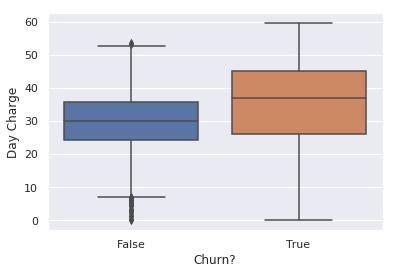

In [38]:
sns.boxplot(data=df, x='Churn?', y='Day Charge')

We can clearly see that there are some differences between churners and non-churners when it comes to the day charges.<br><br>
We can even extend this, and plot a quantitative feature against two categorical. For that we use `catplot()`. Here, we plot the differences between churners and non-churners compared against the area code they have. Nonetheless, we get almost the same result for all three plots.

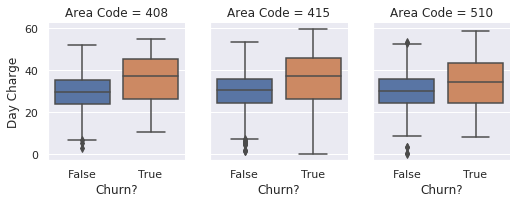

In [39]:
sns.catplot(x='Churn?', y='Day Charge', col='Area Code',
               data=df, kind="box",
               col_wrap=4, height=3, aspect=.8);

### Categorical vs. Categorical<br><br>
Last but not the least, we can plot the relationship between two categorical features. For that we use the old friend `countplot()`.

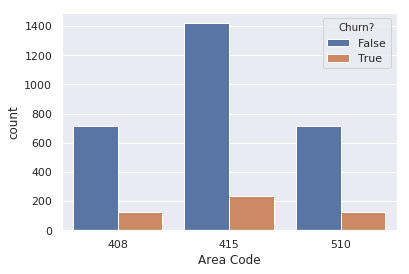

In [40]:
sns.countplot(data=df, hue='Churn?', x='Area Code')

We might think there are more churners in the 415 area code group, but that's only because there are more people in general from that same area. We can further plot the relationship between other categorical features, maybe we find something interesting.

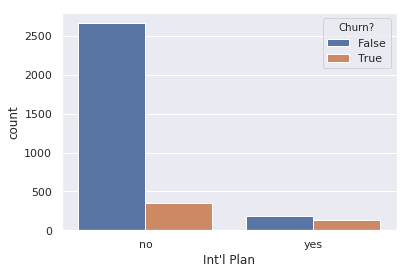

In [43]:
sns.countplot(data=df, x='Int\'l Plan', hue='Churn?')

Rate of churners in the group of people without the international plan is much higher than the group of people that do have said plan.<br><br>
## Additional Resources<br>
<ul><li>Matplotlib <a href='https://matplotlib.org/users/index.html'>documentation</a></li>
    <li>Seaborn <a href='https://seaborn.pydata.org/'>documentation</a></li>
    <li>Awesome <a href='https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e'>article</a> on Plotly - interactive plotting library</li>
    <li><a href='https://eazybi.com/static/img/blog_page/posts/2016_03_01/chart-selection-diagram.png'>"When to use each plot?"</a> suggestion picture</li></ul>